In [2]:
import pandas as pd

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

### Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [4]:
data = pd.read_csv('archive/USvideos.csv')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
# Перевод столбцов с датой публикации и датой попадания в тренды в формат даты
data['trending_date'] = pd.to_datetime(data['trending_date'], format = '%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format = '%Y.%m.%d').dt.date

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  object        
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [8]:
# Открываем файл с категорией видео
category = pd.read_json('archive/US_category_id.json')
# category.head()

In [9]:
# Вытаскиваем id и название категории из столбца 'items'
category['new'] = category['items'].apply(lambda x: x.get('snippet'))
category['id'] = category['items'].apply(lambda x: x.get('id'))
category['title'] = category['new'].apply(lambda x: x.get('title'))
# category.head()

In [10]:
# Переводим столбец 'id' в формат 'int64'. Оставляем только столбцы с id и названием категории
category = category.loc[:, ['id', 'title']]
category['id'] = category['id'].astype('int64')
category.rename(columns = {'title': 'title_category'}, inplace = True)
category.head()

,id,title_category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [11]:
# Добавляем столбец с названием категории в основную таблицу
data = data.merge(category, left_on = 'category_id' ,right_on = 'id', how = 'left')
data.drop(['id'], axis = 1, inplace = True)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


<AxesSubplot:title={'center':'Количество просмотров видео по категориям'}, xlabel='title_category'>

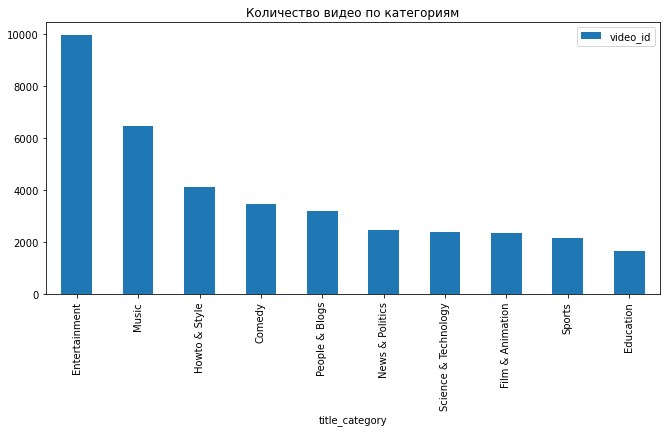

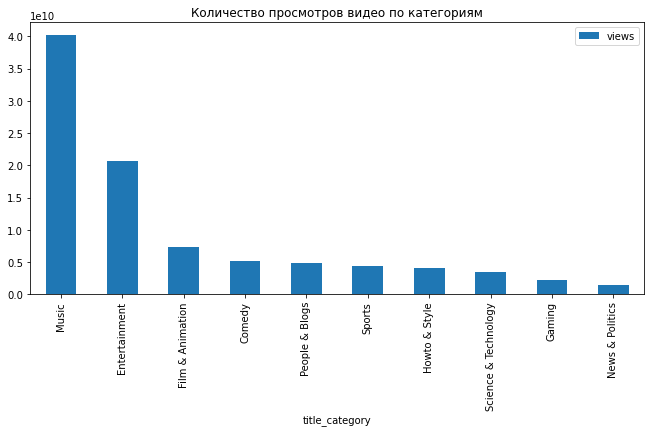

In [12]:
# Диаграммы с количеством видео и количеством просмотров в разрезе жанров. Больше всего выходит видео в жанре "Развлечения",
# затем "Музыка" и "Стиль". По количеству просмотров лидирует жанр "Музыка", затем "Развлечения" и "Фильмы". 
data_category = (data[['video_id', 'title_category']].groupby(['title_category']).count()
                .sort_values('video_id', ascending = False).head(10))
data_view = (data[['views', 'title_category']].groupby(['title_category']).sum()
                .sort_values('views', ascending = False).head(10))

data_category.plot(kind = 'bar', title='Количество видео по категориям')
data_view.plot(kind = 'bar', title='Количество просмотров видео по категориям')

<AxesSubplot:title={'center':'Взаимосвязь между количеством лайков и количеством просмотров'}, xlabel='likes', ylabel='views'>

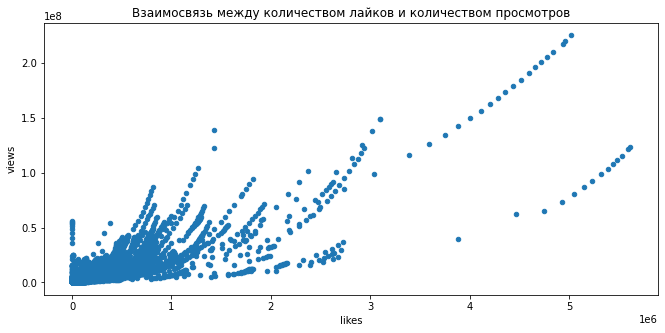

In [13]:
# С увеличением количества просмотров растет количество лайков.
data.plot(kind='scatter', x='likes', y='views', title='Взаимосвязь между количеством лайков и количеством просмотров')

In [14]:
data_index = data[['views', 'likes', 'dislikes', 'comment_count', 'title_category']].groupby('title_category').sum().sort_values('views', ascending = False)
data_index.head()

,views,likes,dislikes,comment_count
title_category,,,,
Music,40132892190,1416838584,51179008,125296396
Entertainment,20604388195,530516491,42987663,73566498
Film & Animation,7284156721,165997476,6075148,17887060
Comedy,5117426208,216346746,7230391,22545582
People & Blogs,4917191726,186615999,10187901,24778032


array([<AxesSubplot:title={'center':'likes'}, xlabel='title_category'>,
       <AxesSubplot:title={'center':'dislikes'}, xlabel='title_category'>,
       <AxesSubplot:title={'center':'comment_count'}, xlabel='title_category'>],
      dtype=object)

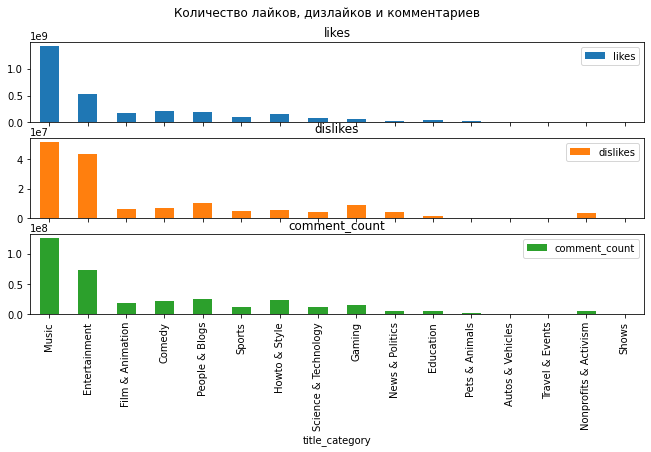

In [15]:
# Количество лайков, дизлайков и комментариев в разрезе категорий, отсортированным по просмотрам. В целом со снижением
# просмотров количество показателей уменьшается, но по некоторым категориям это не так. Например по категории "Некоммерческие 
# организации и активизм" на предпоследнем месте по просмотрам активность зрителей выше. Так же это можно отметить у категорий
# "Люди и блоги", "Стиль", "Игры"
data_index.drop('views', axis=1).plot.bar(subplots=True, title='Количество лайков, дизлайков и комментариев')

In [16]:
data_by_output = data[['publish_time', 'channel_title']].groupby(['publish_time']).count().sort_values('publish_time')
# data_by_output.head()

<AxesSubplot:xlabel='Год', ylabel='Количество'>

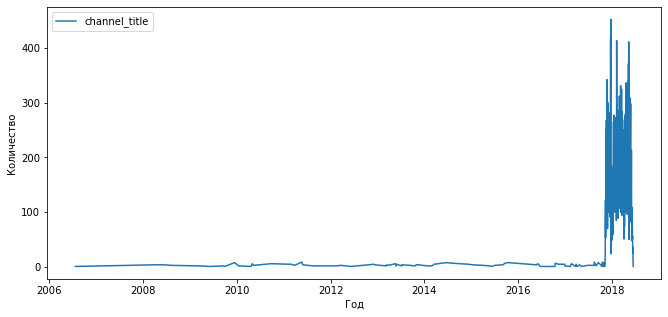

In [17]:
# Количество видео за весь период
data_by_output.plot(xlabel='Год', ylabel='Количество')